<a href="https://colab.research.google.com/github/adithya-prabhu-22/deep_learning_algos/blob/main/VGnet16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np

In [26]:
model=VGG16(weights='imagenet')

In [10]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
img_path='/content/38.jpg'

In [12]:
img=image.load_img(img_path,target_size=(224,224))

In [14]:
for i, layer in enumerate(model.layers):
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print("layer no", i, layer.name, filters.shape)

layer no 1 block1_conv1 (3, 3, 3, 64)
layer no 2 block1_conv2 (3, 3, 64, 64)
layer no 4 block2_conv1 (3, 3, 64, 128)
layer no 5 block2_conv2 (3, 3, 128, 128)
layer no 7 block3_conv1 (3, 3, 128, 256)
layer no 8 block3_conv2 (3, 3, 256, 256)
layer no 9 block3_conv3 (3, 3, 256, 256)
layer no 11 block4_conv1 (3, 3, 256, 512)
layer no 12 block4_conv2 (3, 3, 512, 512)
layer no 13 block4_conv3 (3, 3, 512, 512)
layer no 15 block5_conv1 (3, 3, 512, 512)
layer no 16 block5_conv2 (3, 3, 512, 512)
layer no 17 block5_conv3 (3, 3, 512, 512)


In [15]:
filters,biases=model.layers[1].get_weights()

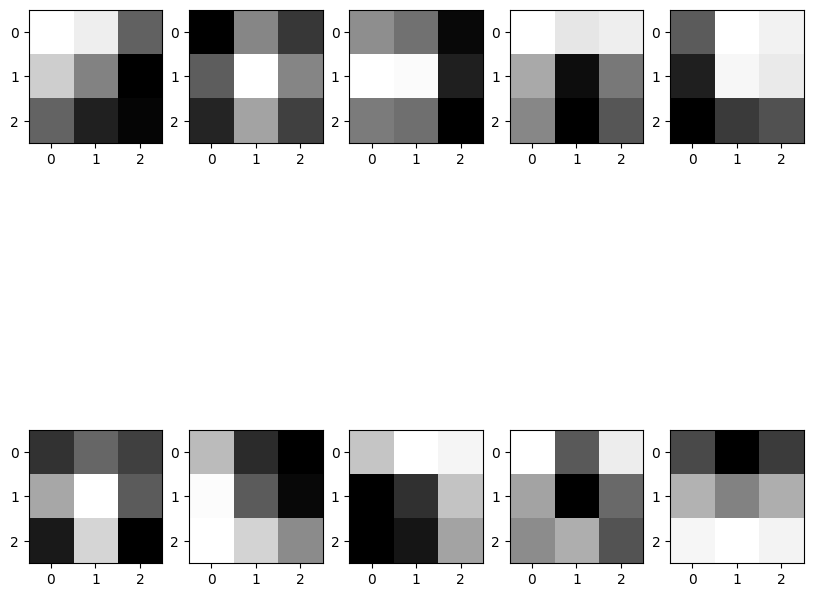

In [17]:
n_filters=10
ix=1
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
for i in range(n_filters):
  f=filters[:,:,:,i]
  ax=fig.add_subplot(2,5,i+1)
  ax.imshow(f[:,:,0], cmap='gray')
plt.show()

In [20]:
layers_list=[1,2,4,5,7,8,9,12,13,15,16,17]

filter of layer : 1


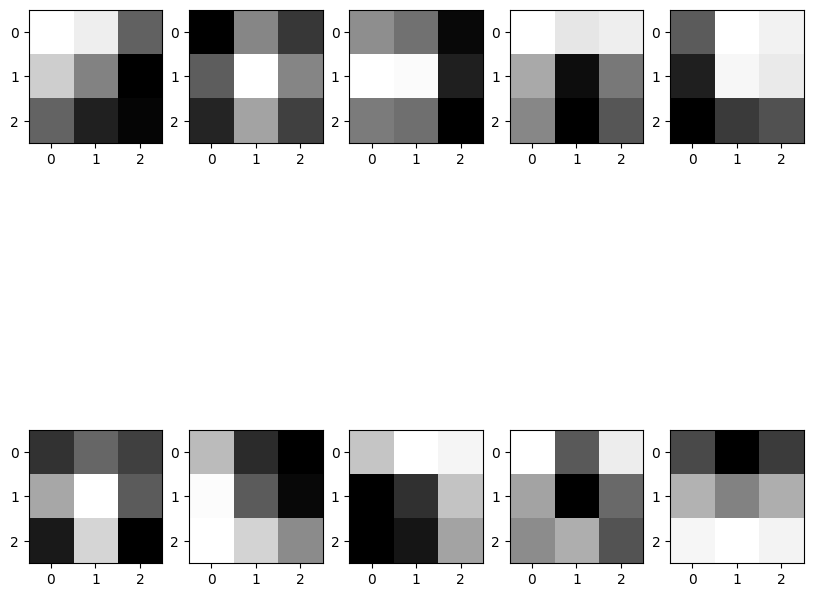

filter of layer : 2


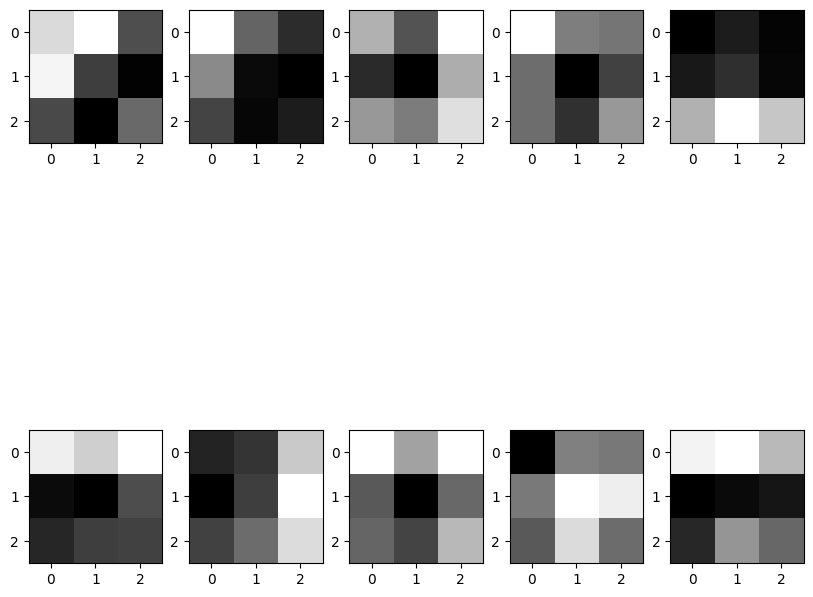

filter of layer : 4


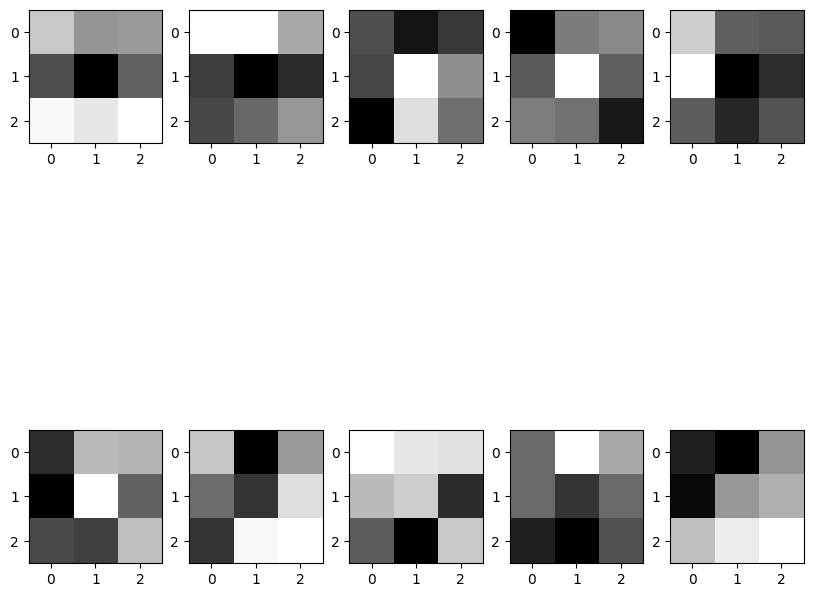

filter of layer : 5


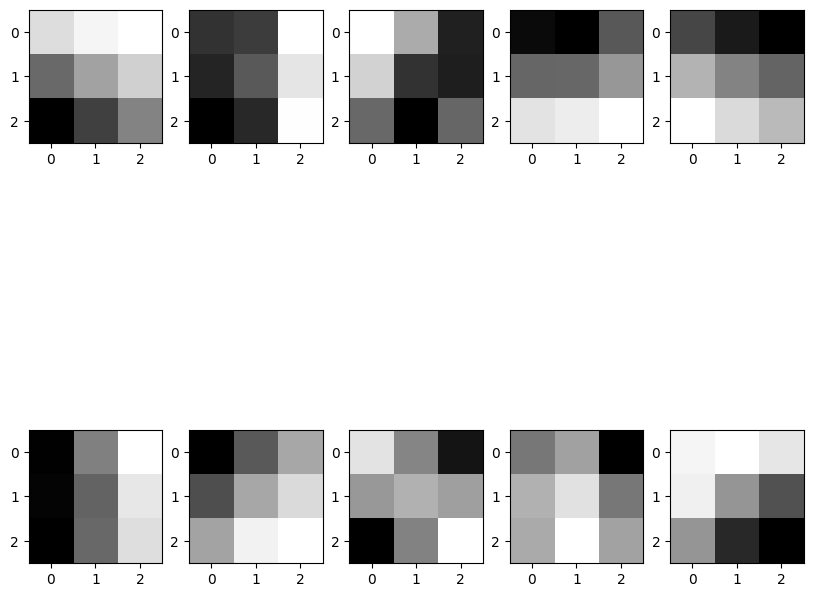

filter of layer : 7


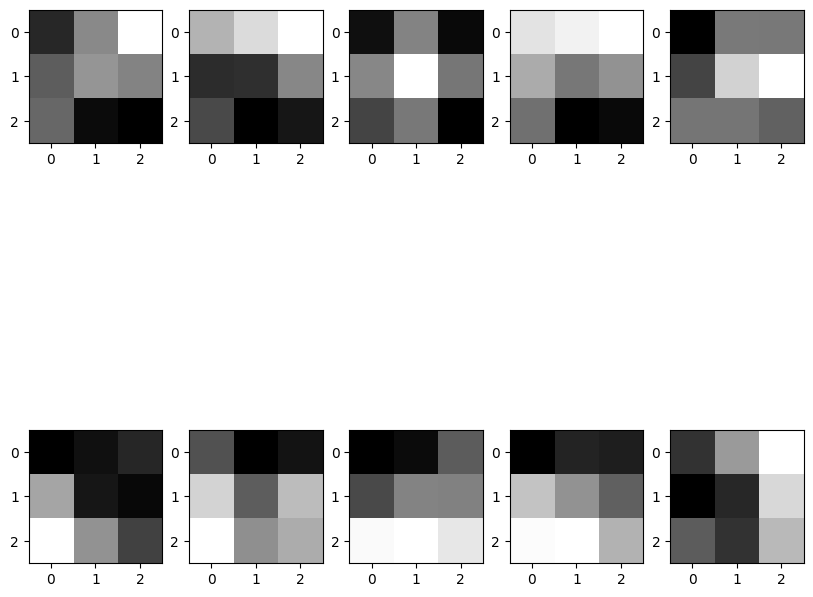

filter of layer : 8


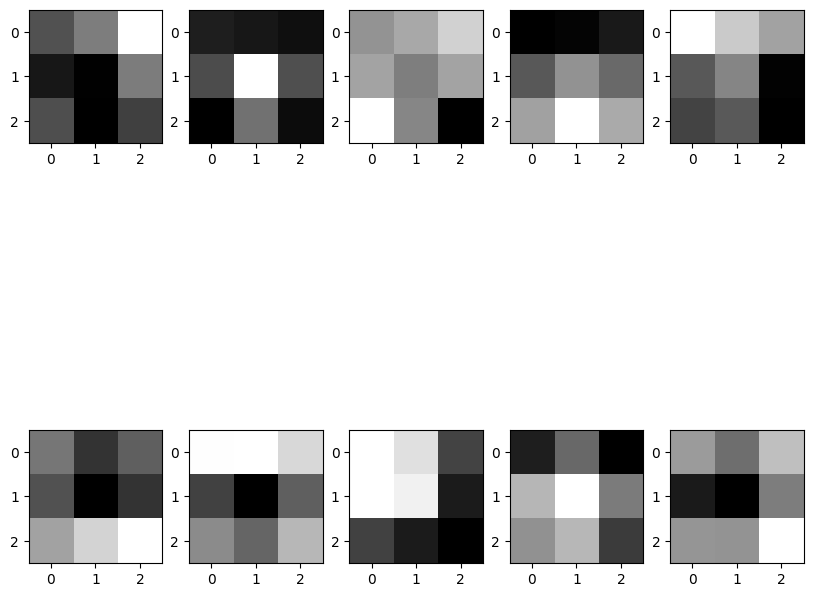

filter of layer : 9


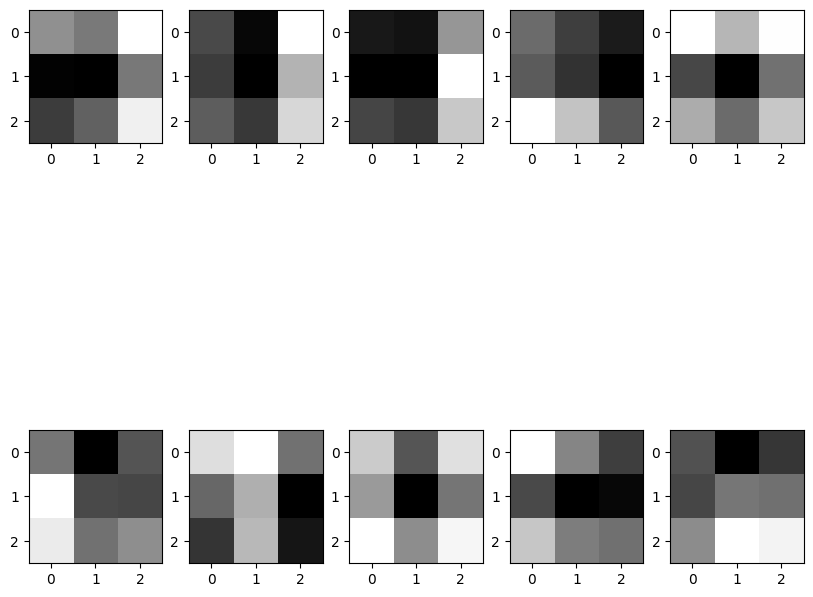

filter of layer : 12


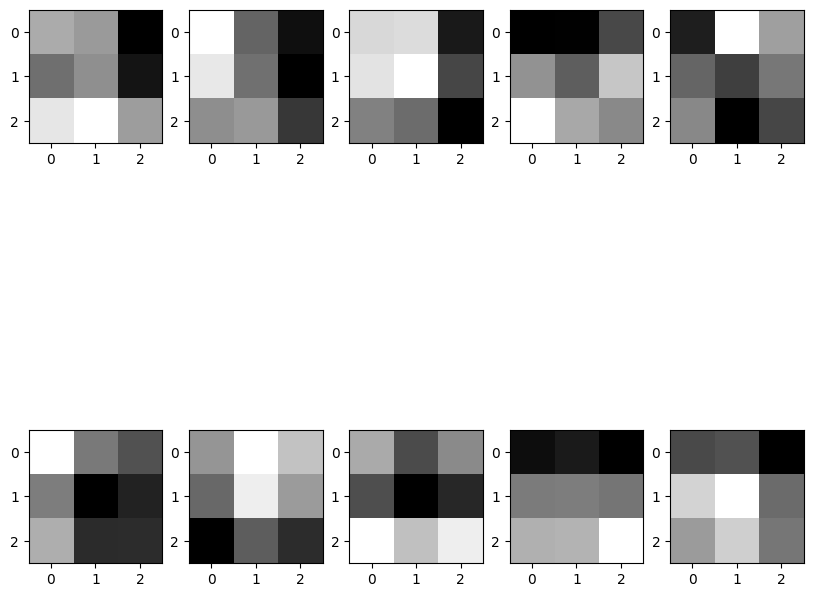

filter of layer : 13


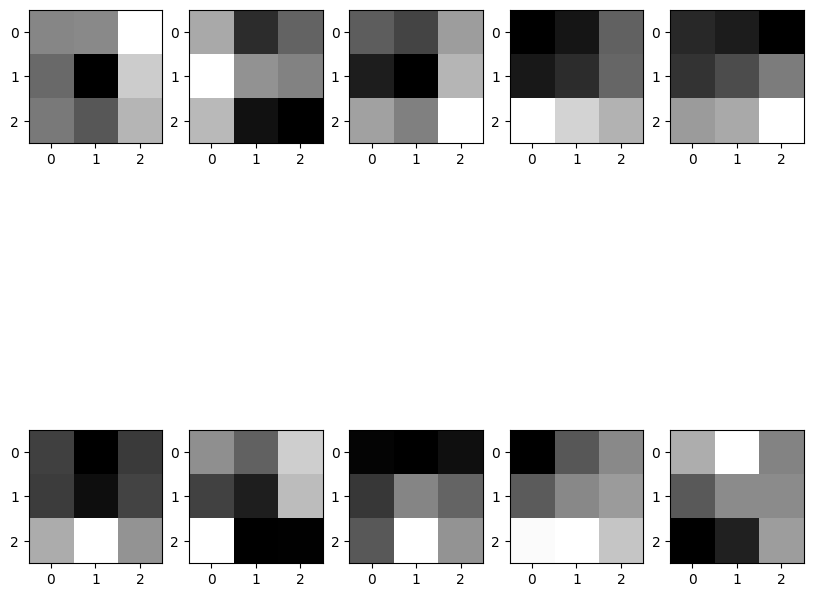

filter of layer : 15


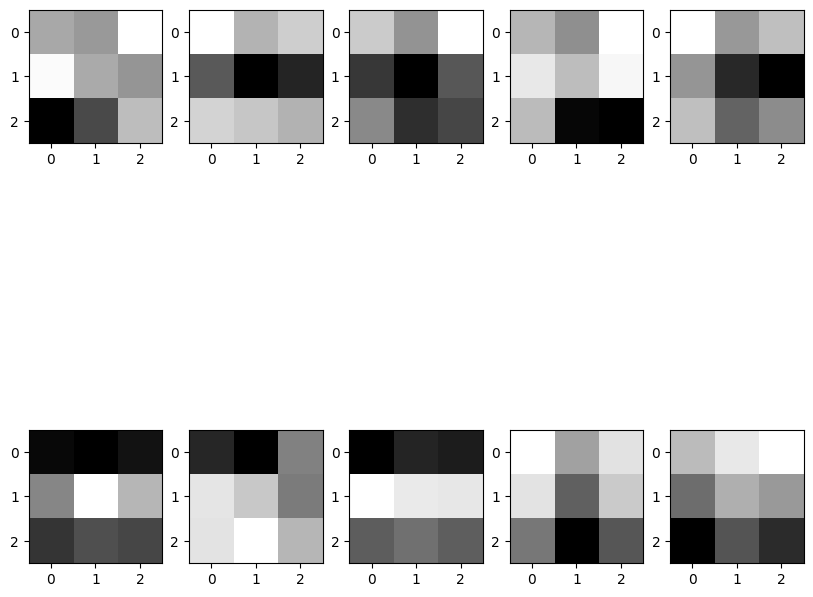

filter of layer : 16


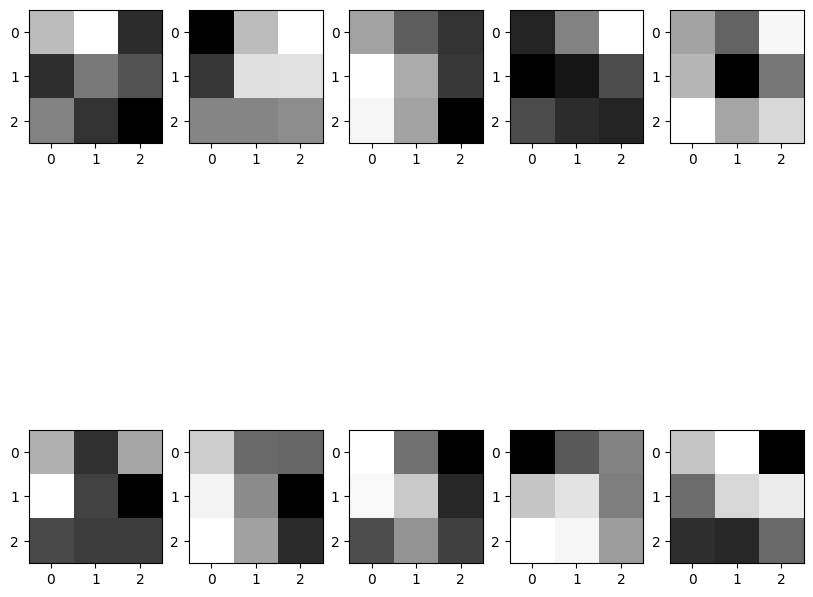

filter of layer : 17


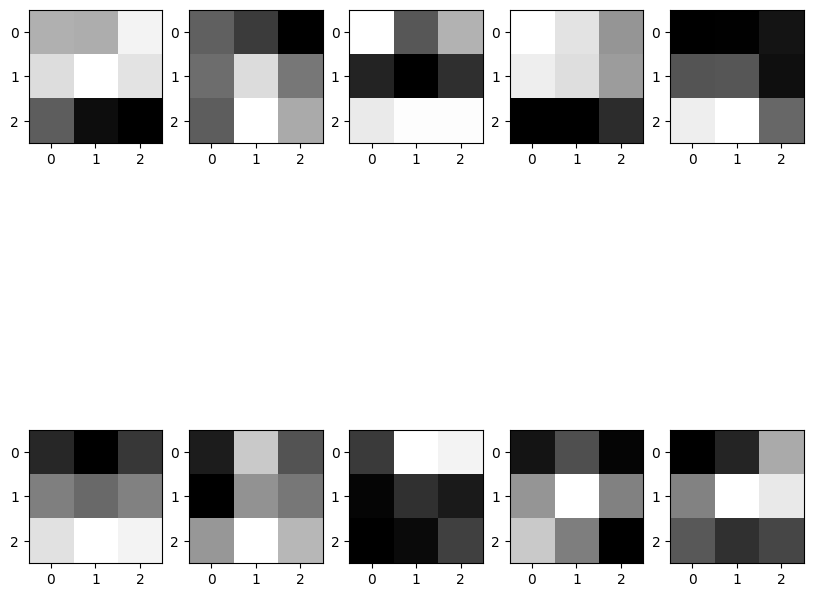

In [21]:
for kx in range(len(layers_list)):
  layer_no=layers_list[kx]
  filters, biases = model.layers[layer_no].get_weights()
  print('filter of layer :',layer_no)
  n_filters=10
  ix=1
  import matplotlib.pyplot as plt
  fig=plt.figure(figsize=(10,10))
  for i in range(n_filters):
    f=filters[:,:,:,i]
    ax=fig.add_subplot(2,5,i+1)
    ax.imshow(f[:,:,0], cmap='gray')
  plt.show()

In [22]:
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
img=preprocess_input(img)

In [32]:
#feature map result of the first conv layer
import tensorflow as tf
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)
feature_map=model2.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


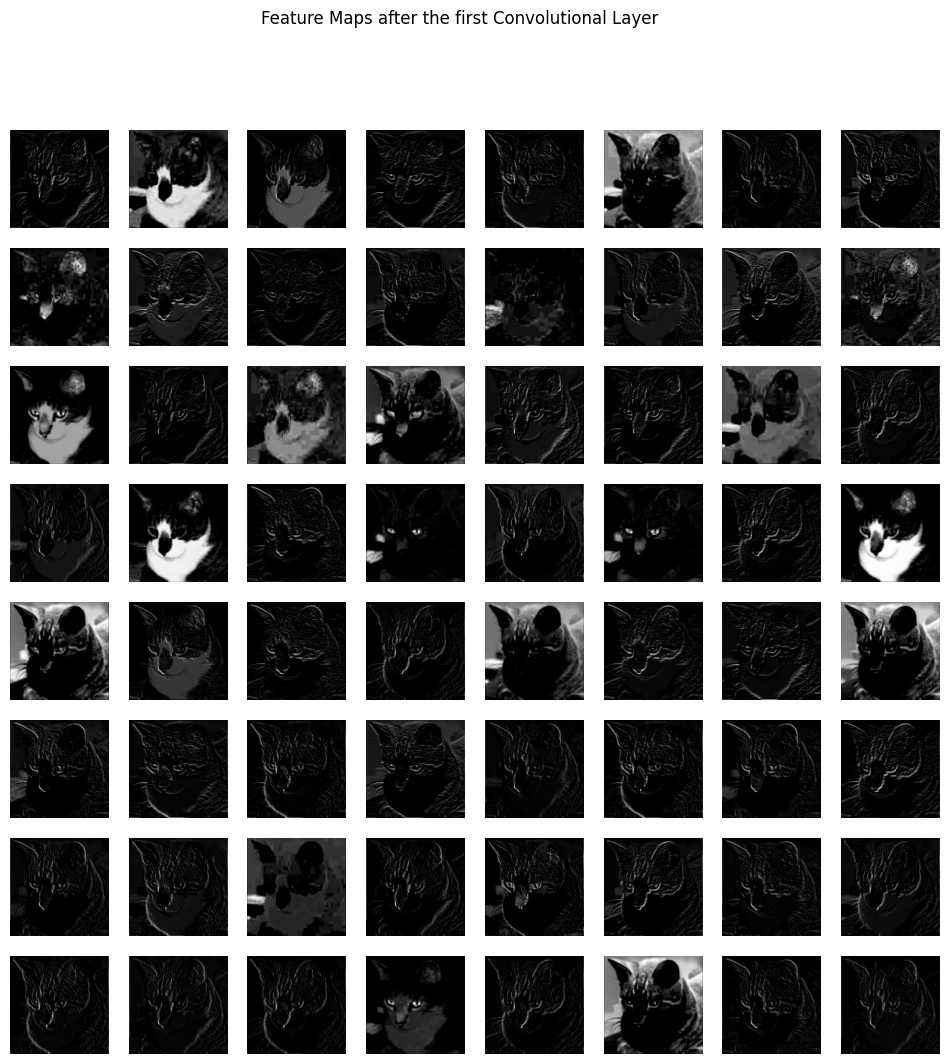

In [33]:
import matplotlib.pyplot as plt

# Visualize the feature maps from the first convolutional layer
n_features = feature_map.shape[-1]
# Adjust the grid size based on the number of features
grid_size = int(np.ceil(np.sqrt(n_features)))
fig = plt.figure(figsize=(grid_size*1.5, grid_size*1.5))

for i in range(n_features):
    # Display the i-th feature map
    ax = fig.add_subplot(grid_size, grid_size, i + 1)
    ax.imshow(feature_map[0, :, :, i], cmap='gray')
    ax.axis('off') # Hide axes
plt.suptitle('Feature Maps after the first Convolutional Layer')
plt.show()

In [35]:
model3 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[16].output)
feature_map2=model3.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


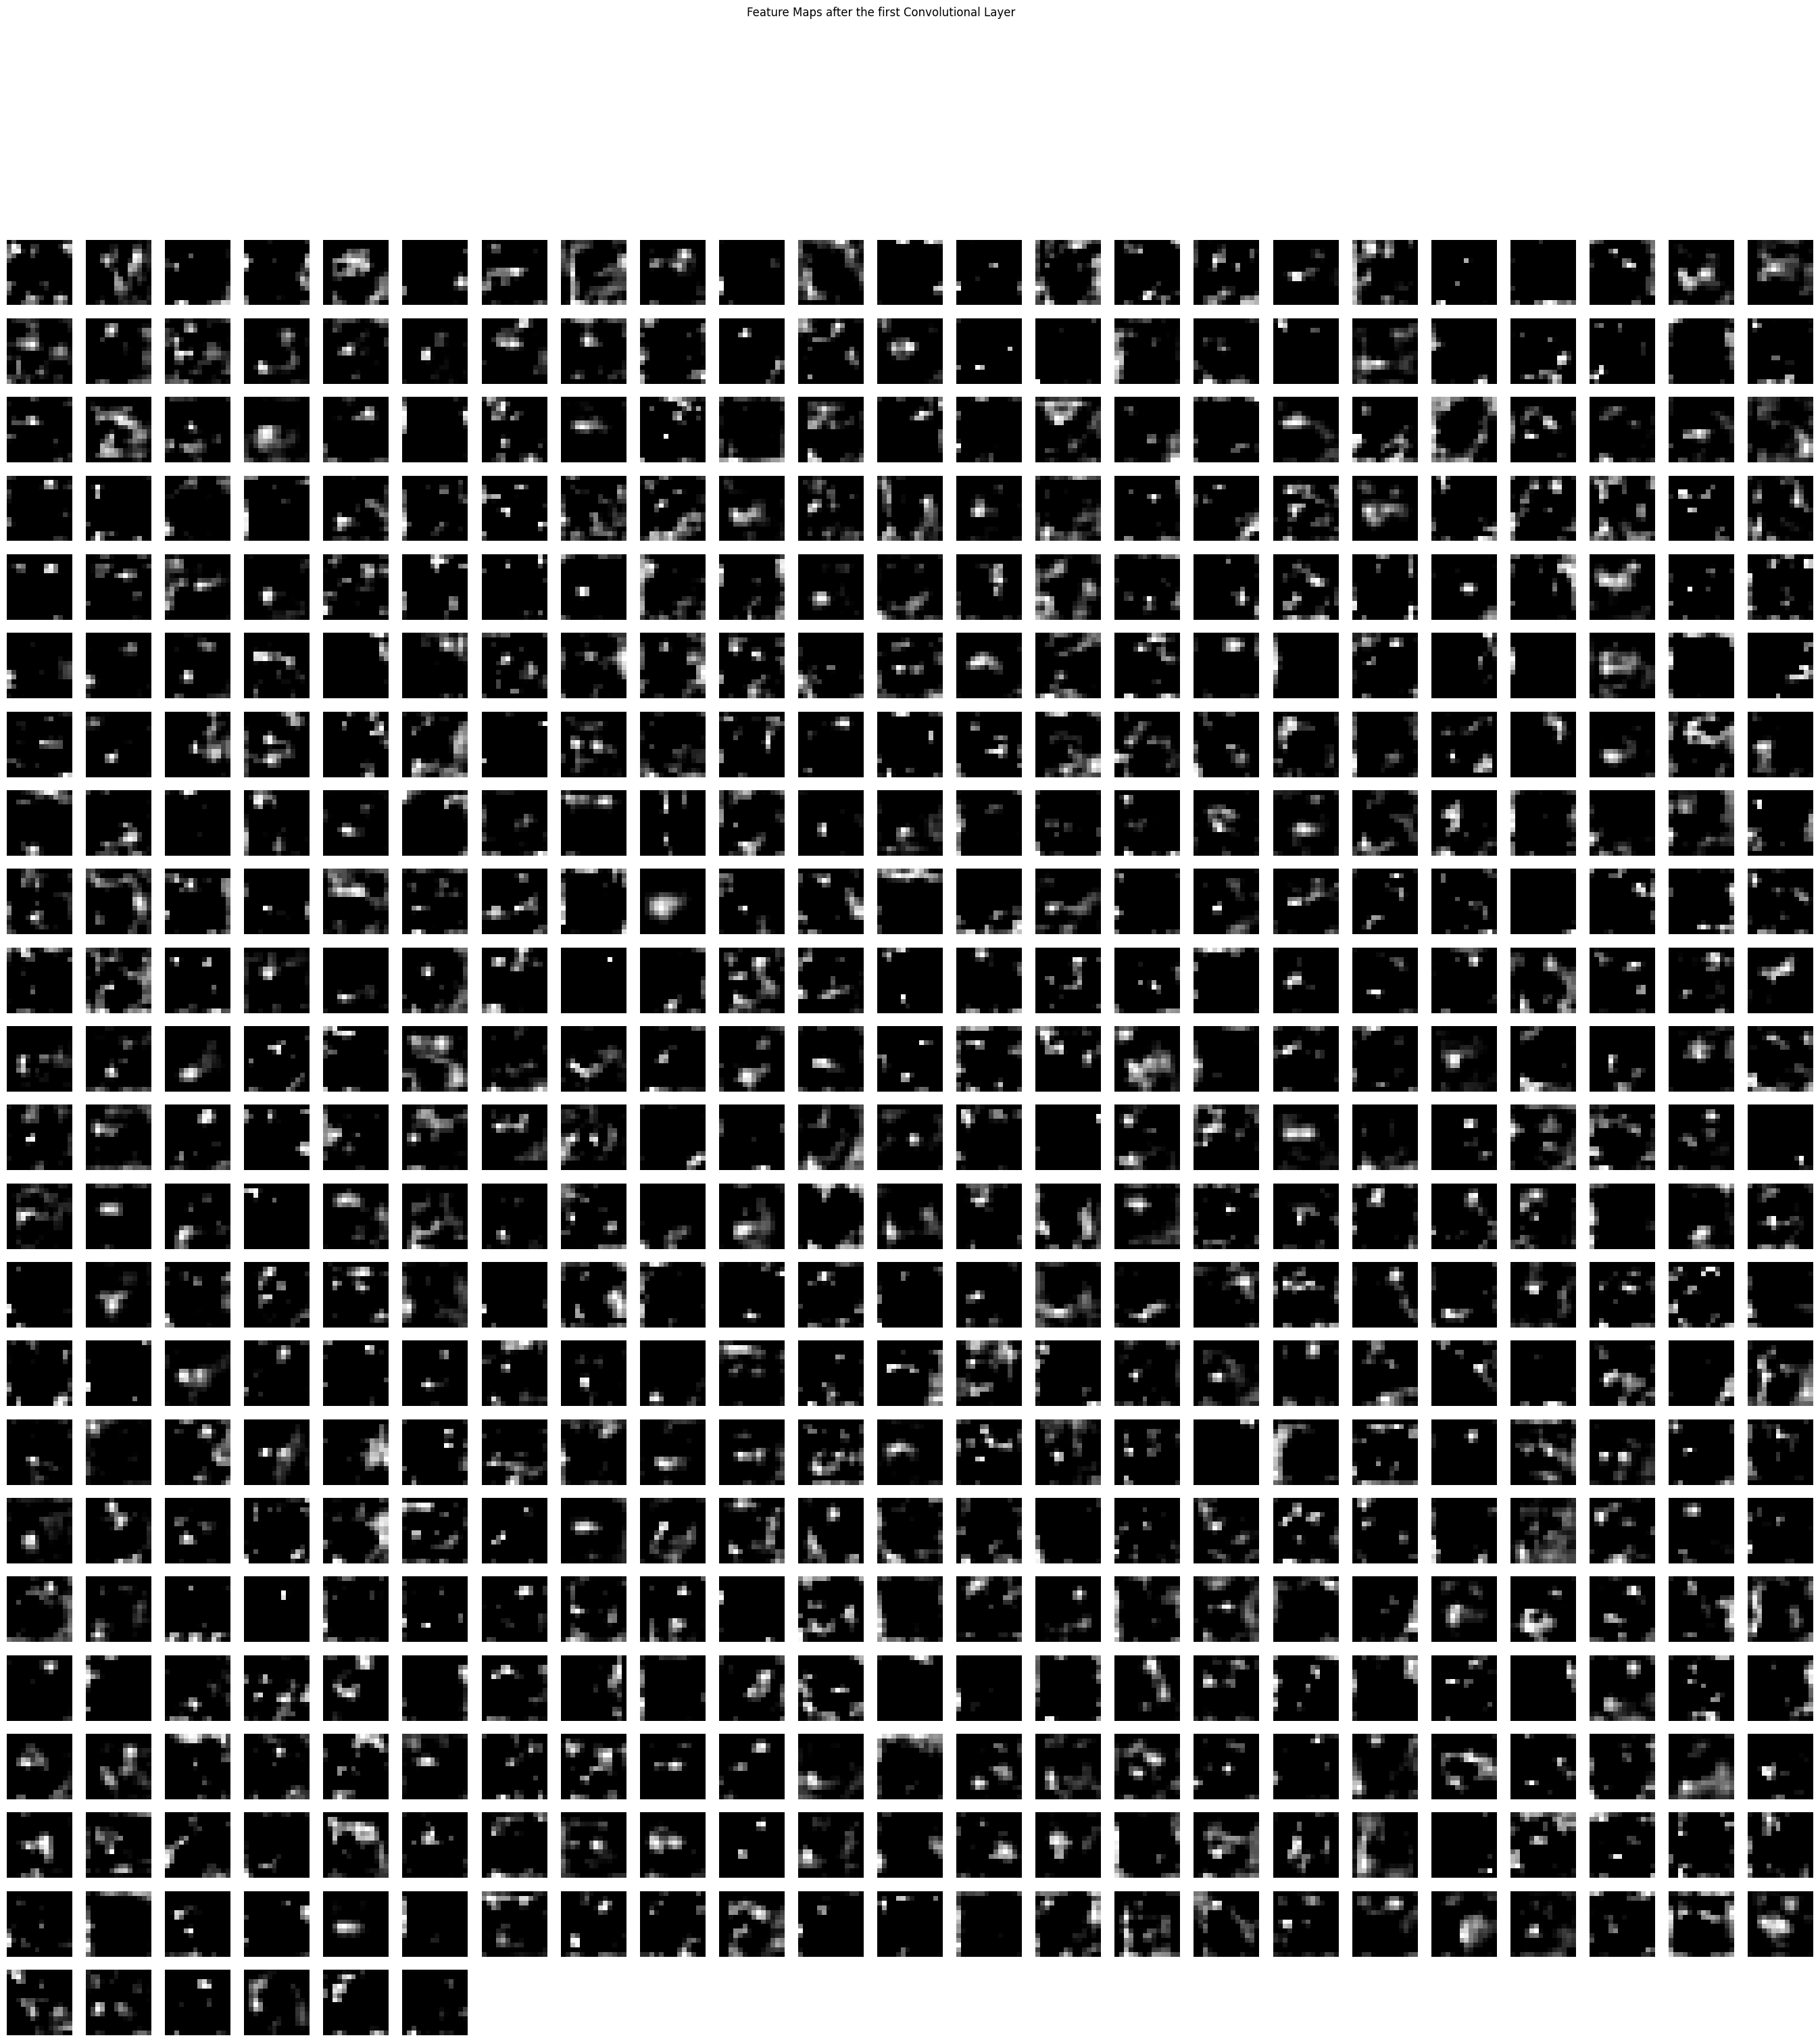

In [36]:
import matplotlib.pyplot as plt

# Visualize the feature maps from the first convolutional layer
n_features2 = feature_map2.shape[-1]
# Adjust the grid size based on the number of features
grid_size = int(np.ceil(np.sqrt(n_features2)))
fig = plt.figure(figsize=(grid_size*1.5, grid_size*1.5))

for i in range(n_features2):
    # Display the i-th feature map
    ax = fig.add_subplot(grid_size, grid_size, i + 1)
    ax.imshow(feature_map2[0, :, :, i], cmap='gray')
    ax.axis('off') # Hide axes
plt.suptitle('Feature Maps after the first Convolutional Layer')
plt.show()